In [1]:
from google.colab import files
uploaded = files.upload()

Saving Download Data - STOCK_PK_XKAR_MEBL.csv to Download Data - STOCK_PK_XKAR_MEBL.csv


Import Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import io
stock = pd.read_csv('Download Data - STOCK_PK_XKAR_MEBL.csv')

Data Exploration

In [32]:
stock

,Date,Open,High,Low,Close,Volume
0,09/01/2023,117.30,117.30,115.00,115.79,"1,117,695"
1,08/31/2023,122.40,122.40,115.00,116.98,"7,393,117"
2,08/30/2023,123.81,124.97,121.00,122.43,"652,749"
3,08/29/2023,126.00,126.00,124.25,124.54,"292,897"
4,08/28/2023,126.02,126.80,125.00,125.69,"1,491,287"
...,...,...,...,...,...,...
245,09/07/2022,119.00,121.00,119.00,120.62,"414,373"
246,09/06/2022,120.05,121.00,118.90,119.51,"219,156"
247,09/05/2022,122.84,122.84,119.80,120.09,"287,637"
248,09/02/2022,122.48,122.48,120.30,120.62,"348,894"


In [33]:
stock.describe()

,Open,High,Low,Close
count,250.000000,250.000000,250.000000,250.000000
mean,104.203240,105.407880,102.764280,103.891280
std,12.371371,12.725606,12.175233,12.475387
min,82.420000,83.700000,82.420000,82.960000
25%,94.822500,95.500000,93.515000,94.190000
50%,100.425000,101.200000,98.875000,99.760000
75%,111.567500,112.780000,110.195000,111.370000
max,134.250000,137.480000,132.010000,134.230000


In [34]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    250 non-null    object 
 1   Open    250 non-null    float64
 2   High    250 non-null    float64
 3   Low     250 non-null    float64
 4   Close   250 non-null    float64
 5   Volume  250 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [35]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,09/01/2023,117.30,117.30,115.00,115.79,"1,117,695"
1,08/31/2023,122.40,122.40,115.00,116.98,"7,393,117"
2,08/30/2023,123.81,124.97,121.00,122.43,"652,749"
3,08/29/2023,126.00,126.00,124.25,124.54,"292,897"
4,08/28/2023,126.02,126.80,125.00,125.69,"1,491,287"


In [37]:
stock.tail()

,Date,Open,High,Low,Close,Volume
245,09/07/2022,119.00,121.00,119.0,120.62,"414,373"
246,09/06/2022,120.05,121.00,118.9,119.51,"219,156"
247,09/05/2022,122.84,122.84,119.8,120.09,"287,637"
248,09/02/2022,122.48,122.48,120.3,120.62,"348,894"
249,09/01/2022,122.00,123.50,120.4,121.17,"475,347"


Data Visualization

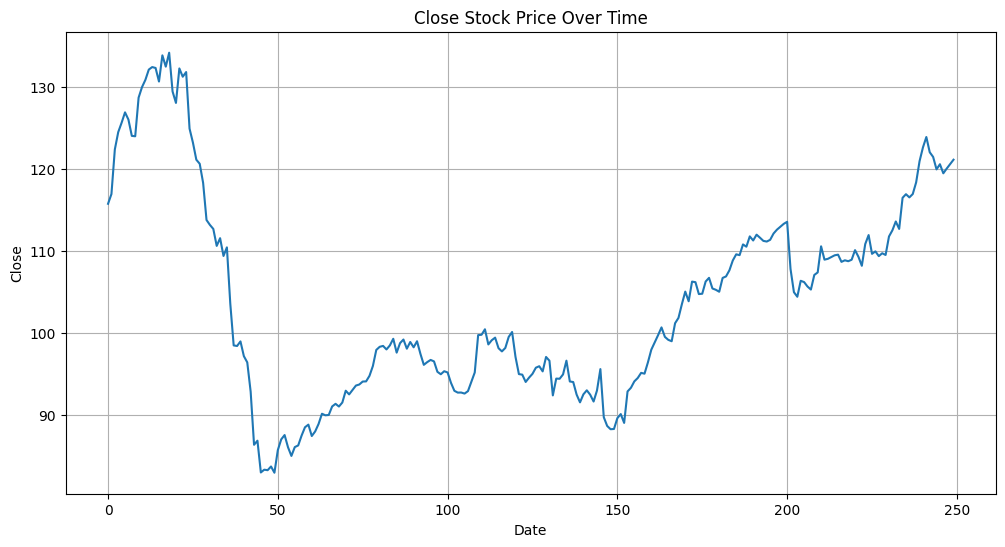

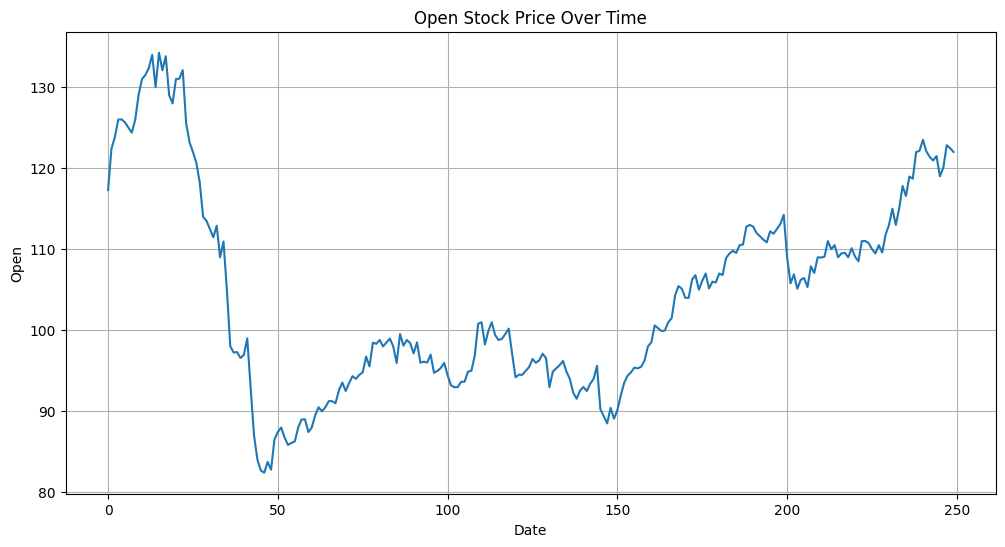

In [49]:
#overall stock price close
plt.figure(figsize=(12, 6))
plt.title("Close Stock Price Over Time")
plt.plot(stock['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()
#overall stock price open
plt.figure(figsize=(12, 6))
plt.title("Open Stock Price Over Time")
plt.plot(stock['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.show()


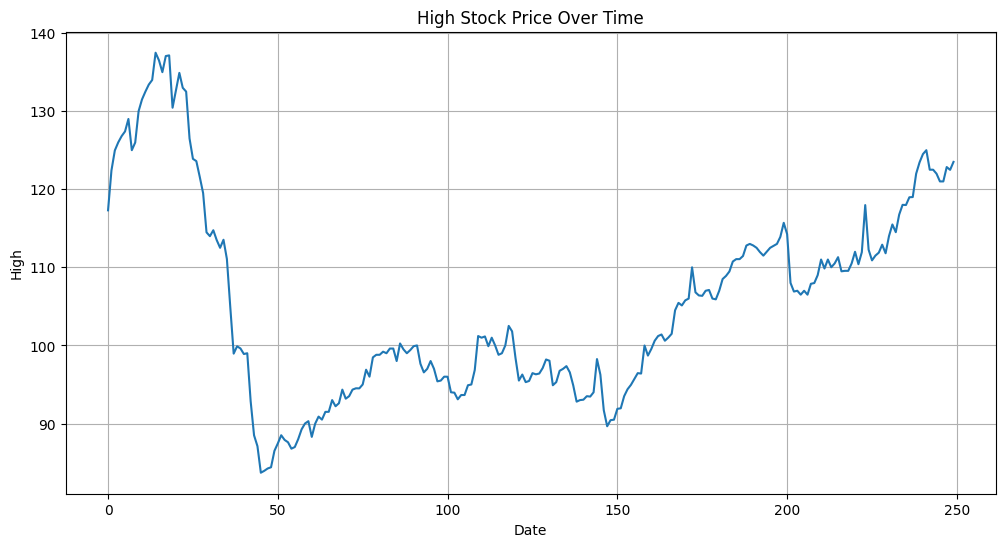

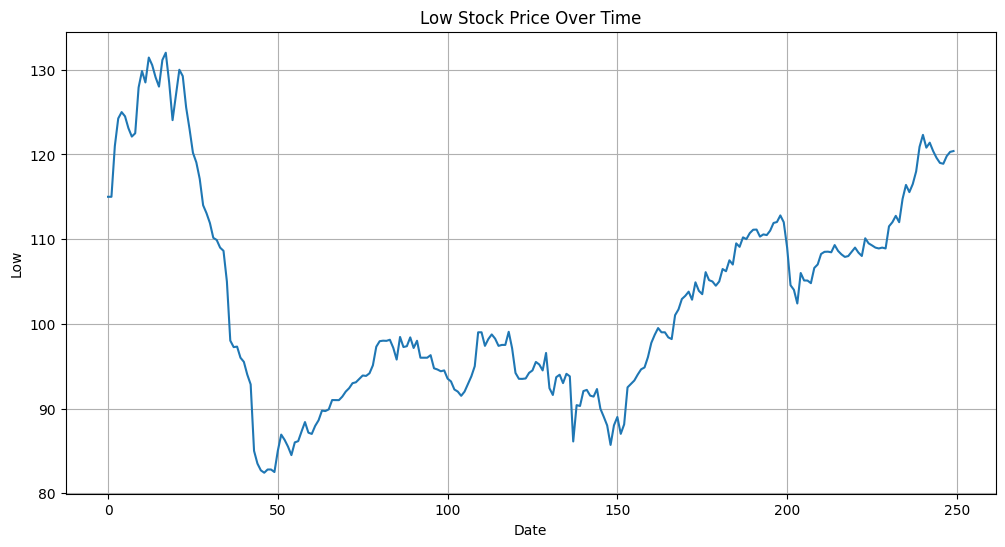

In [50]:
#overall stock price high
plt.figure(figsize=(12, 6))
plt.title("High Stock Price Over Time")
plt.plot(stock['High'])
plt.xlabel('Date')
plt.ylabel('High')
plt.grid(True)
plt.show()
#overall stock price low
plt.figure(figsize=(12, 6))
plt.title("Low Stock Price Over Time")
plt.plot(stock['Low'])
plt.xlabel('Date')
plt.ylabel('Low')
plt.grid(True)
plt.show()

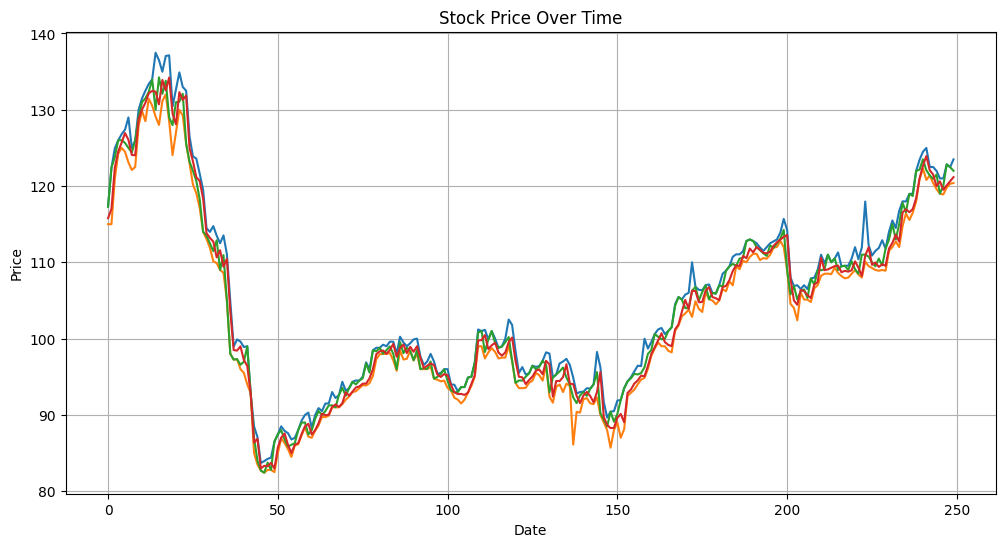

In [55]:
#overall stock price over time
plt.figure(figsize=(12, 6))
plt.title("Stock Price Over Time")
plt.plot(stock['High'])
plt.plot(stock['Low'])
plt.plot(stock['Open'])
plt.plot(stock['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

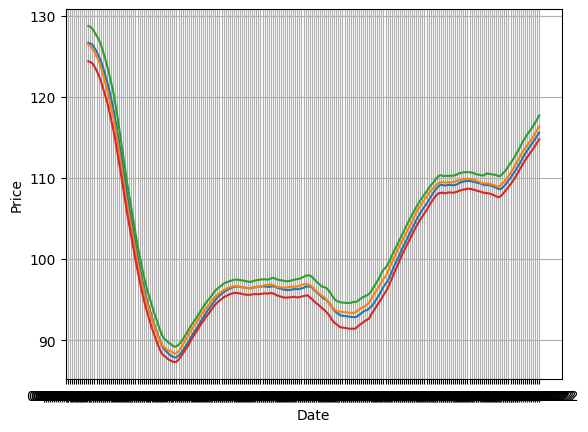

In [54]:
#Moving average stock price for last 1 month
# Calculate the moving averages
Close = stock["Close"].rolling(window=30).mean()
Open = stock["Open"].rolling(window=30).mean()
High = stock["High"].rolling(window=30).mean()
Low = stock["Low"].rolling(window=30).mean()

# Plot the moving averages
plt.plot(stock["Date"], Close, label="Close")
plt.plot(stock["Date"], Open, label="Open")
plt.plot(stock["Date"], High, label="High")
plt.plot(stock["Date"], Low, label="Low")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [59]:
# Calculate daily returns
stock['Daily_Return'] = stock['Close'].pct_change()

# Calculate mean and standard deviation of daily returns
mean_return = stock['Daily_Return'].mean()
std_return = stock['Daily_Return'].std()

print(f'Mean Daily Return: {mean_return}')
print(f'Standard Deviation of Daily Return: {std_return}')

Mean Daily Return: 0.0003167053842652561
Standard Deviation of Daily Return: 0.01632964295377734


Linear Regression

In [90]:
# Define the features (X) and target variable (y)
X = stock['Open'].values.reshape(-1, 1)
y = stock['Close'].values
# Model Selection
# Choose a linear regression model
model = LinearRegression()
# Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
#Making Predictions
# Assume you have the latest stock market data in a variable 'latest_data'
latest_data = 117.30
# Predict the closing price using the trained model
predicted_price = model.predict([[latest_data]])
print(f"Predicted Closing Price: {predicted_price}")

Mean Squared Error: 3.3469238988364327
Predicted Closing Price: [116.80657959]


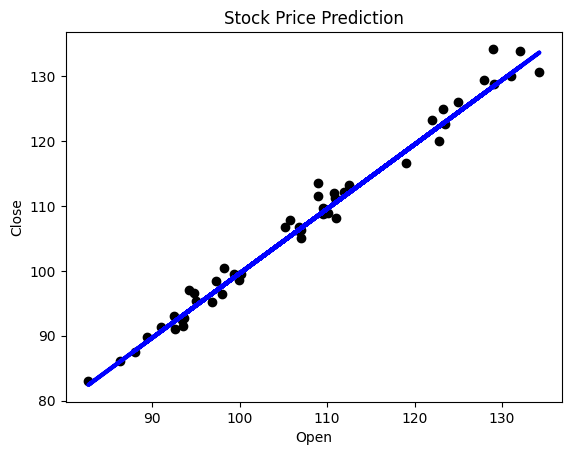

In [89]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Stock Price Prediction')
plt.show()

Remember, stock market prediction is a complex task, and no model can guarantee accurate predictions. It is essential to consider other factors such as market trends, news, and economic indicators in conjunction with machine learning for more accurate predictions.